In [1]:
from models import *
from static import *
import numpy as np
import matplotlib.pyplot as plt
import networkx as nx
import pandas as pd

import warnings
warnings.filterwarnings('ignore')

import sys
sys.setrecursionlimit(10000)

### Simulate One Model

In [2]:
steps = 10
model = abmodel(static_map_v0(), all_agents())
model.run_model(steps)
model_results = model.datacollector.get_model_vars_dataframe()
model_results.head(20)

100%|██████████████████████████████████████████████████████████████████████████████████| 10/10 [00:05<00:00,  1.77it/s]


,Step,(Corporate V0),Trade Volume (Corporate V0),Price (Corporate V0),(Central Bank V0),interest_rate,inflation_rate,growth_rate,target_interest_rate,target_inflation_rate,...,currency_b,lend,(Local Bank),Trade Volume (Local Bank),Price (Local Bank),Hedge Volume (Local Bank),Hedge Price (Local Bank),(Arbitrager),Trade Volume (Arbitrager),Price (Arbitrager)
0,1,200,2,103.586754,2,"(0, 0)","(0, 0)","(0, 0)","(0, -0.01)","(0.02, 0.015)",...,"(0, 500000)","(0, 0)",8,2,103.586754,963,82.918557,4,1314,87.869676
1,2,200,1,95.730000,2,"(0, 0)","(0, 0)","(0, 0)","(0, -0.01)","(0.02, 0.015)",...,"(0, 500000)","(0, 0)",8,1,95.730000,2,90.688726,4,6,90.059434
2,3,200,2,96.670000,2,"(0, 0)","(0, 0)","(0, 0)","(0, -0.01)","(0.02, 0.015)",...,"(0, 500000)","(0, 0)",8,2,96.670000,52,93.134171,4,18,90.364981
3,4,200,0,NaN,2,"(0, 0)","(0, 0)","(0, 0)","(0, -0.01)","(0.02, 0.015)",...,"(0, 500000)","(0, 0)",8,0,NaN,0,NaN,4,0,NaN
4,5,200,2,103.690000,2,"(0, 0)","(0, 0)","(0, 0)","(0, -0.01)","(0.02, 0.015)",...,"(0, 500000)","(0, 0)",8,2,103.690000,19,102.994103,4,18,96.610096
5,6,200,0,NaN,2,"(0, 0)","(0, 0)","(0, 0)","(0, -0.01)","(0.02, 0.015)",...,"(0, 500000)","(0, 0)",8,0,NaN,5,102.659993,4,6,97.142953
6,7,200,0,NaN,2,"(0, 0)","(0, 0)","(0, 0)","(0, -0.01)","(0.02, 0.015)",...,"(0, 500000)","(0, 0)",8,0,NaN,2,102.669988,4,2,97.499913
7,8,200,0,NaN,2,"(0, 0)","(0, 0)","(0, 0)","(0, -0.01)","(0.02, 0.015)",...,"(0, 500000)","(0, 0)",8,0,NaN,0,NaN,4,0,NaN
8,9,200,0,NaN,2,"(0, 0)","(0, 0)","(0, 0)","(0, -0.01)","(0.02, 0.015)",...,"(0, 500000)","(0, 0)",8,0,NaN,0,NaN,4,0,NaN
9,10,200,3,104.299577,2,"(0, 0)","(0, 0)","(0, 0)","(0, -0.01)","(0.02, 0.015)",...,"(0, 500000)","(0, 0)",8,3,104.299577,17,94.276301,4,2,97.929967


### Corporate Details

In [11]:
model.corporate_details.by_agent(model.corporate_details.all_ids()[1]).tail(50)

,Step,Position,Currency A,Currency B,Quotes,Traded Price,Traded Amount,Traded with,Firm Value
0,0,"(18, 20)",651.000,28800.0,"(None, None, None)",[],[],[],939.000000
1,1,"(18, 20)",630.500,28882.0,"(None, None, None)",[],[],[],949.779239
2,2,"(18, 21)",610.000,28964.0,"(None, None, None)",[],[],[],929.549868
3,3,"(17, 21)",589.500,29046.0,"(None, None, None)",[],[],[],907.463875
4,4,"(16, 21)",569.000,29128.0,"(None, None, None)",[],[],[],887.234459
5,5,"(16, 21)",548.250,29160.0,"(None, None, None)",[],[],[],857.099229
6,6,"(16, 22)",527.500,29192.0,"(None, None, None)",[],[],[],837.295182
7,7,"(17, 22)",506.750,29224.0,"(None, None, None)",[],[],[],816.818966
8,8,"(17, 23)",486.000,29256.0,"(None, None, None)",[],[],[],795.948088
9,9,"(17, 24)",465.250,29288.0,"(None, None, None)",[],[],[],775.044796


In [12]:
model.corporate_details.by_step(steps)

,Agent ID,Position,Currency A,Currency B,Quotes,Traded Price,Traded Amount,Traded with,Firm Value
0,4640,"(4, 21)",367.50000,27740.00,"(None, None, None)",[],[],[],649.754782
1,4641,"(17, 24)",444.37500,29295.00,"(None, None, None)",[],[],[],742.451923
2,4642,"(24, 45)",2124.62500,112935.00,"(None, None, None)",[],[],[],3273.739774
3,4643,"(2, 2)",1939.87500,138795.00,"(None, None, None)",[],[],[],3352.115537
4,4644,"(16, 12)",1300.50000,73730.00,"(None, None, None)",[],[],[],2050.703500
...,...,...,...,...,...,...,...,...,...
195,4835,"(22, 25)",1211.50000,92840.00,"(None, None, None)",[],[],[],2156.147945
196,4836,"(16, 67)",1608.15625,96441.25,"(None, None, None)",[],[],[],2589.446950
197,4837,"(4, 26)",1260.50000,70330.00,"(None, None, None)",[],[],[],1976.108466
198,4838,"(9, 19)",2152.00000,82410.00,"(None, None, None)",[],[],[],2990.522589


### Bank Details

In [13]:
model.bank_details.all_ids()

[4842, 4843, 4844, 4845, 4846, 4847, 4848, 4849]

In [14]:
model.bank_details.by_agent(model.bank_details.all_ids()[5]).tail(20)

,Step,Position,Currency A,Currency B,Traded Price,Traded Amount,Traded with,Hedged Price,Hedged Amount,Hedged with,Arbed Price,Arbed Amount,Arbed with,Firm Value
0,0,"(15, 71)",1008.0,170300.00,[],[],[],[],[],[],[],[],[],2711.000000
1,1,"(15, 71)",1316.3,135699.75,[],[],[],"[88.06, 88.06, 88.06, 88.06, 88.06, 88.06, 88....","[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, ...","[4844, 4844, 4844, 4844, 4844, 4844, 4844, 484...","[136.05, 135.8, 135.55, 135.31, 135.06, 134.81...","[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, ...","[4852, 4852, 4852, 4852, 4852, 4852, 4852, 485...",2816.407782
2,2,"(15, 71)",1313.6,135785.44,[],[],[],[87.69],[-1],[4848],[],[],[],2811.674139
3,3,"(15, 71)",1276.9,139183.46,[96.67],[-37],[4669],"[92.58, 92.58, 92.59, 92.59, 92.59, 92.59, 92....","[1, 1, 1, 1, 1, 1, 1, 1]","[4846, 4846, 4846, 4846, 4846, 4846, 4846, 4846]",[],[],[],2800.528462
4,4,"(15, 71)",1275.2,139181.46,[],[],[],[],[],[],[],[],[],2795.810292
5,5,"(15, 71)",1273.5,139179.46,[],[],[],[],[],[],[],[],[],2747.624451
6,6,"(15, 71)",1271.8,139177.46,[],[],[],[],[],[],[],[],[],2748.797347
7,7,"(15, 71)",1270.1,139175.46,[],[],[],[],[],[],[],[],[],2746.762706
8,8,"(15, 71)",1268.4,139173.46,[],[],[],[],[],[],[],[],[],2742.851319
9,9,"(15, 71)",1266.7,139171.46,[],[],[],[],[],[],[],[],[],2738.790755


In [15]:
model.bank_details.by_step(steps)

,Agent ID,Position,Currency A,Currency B,Traded Price,Traded Amount,Traded with,Hedged Price,Hedged Amount,Hedged with,Arbed Price,Arbed Amount,Arbed with,Firm Value
0,4842,"(13, 3)",1289.0,98442.47,[],[],[],[],[],[],[],[],[],2290.653134
1,4843,"(3, 3)",1712.0,144408.55,[],[],[],[],[],[],[],[],[],3181.358466
2,4844,"(10, 51)",1322.0,121833.30,[103.88],[-42],[4742],[],[],[],[],[],[],2561.655067
3,4845,"(23, 44)",1388.0,110902.95,[104.51],[-46],[4669],[],[],[],[98.01],[1],[4853],2516.438645
4,4846,"(16, 67)",1255.0,131660.63,[],[],[],"[94.76, 94.77, 94.77, 94.77, 94.77, 94.77, 94....","[-1, -1, -1, -1, -1, -1, -1, -1]","[4849, 4849, 4849, 4849, 4849, 4849, 4849, 4849]",[],[],[],2594.648250
5,4847,"(15, 71)",1260.0,139639.86,[],[],[],"[94.08, 94.08, 94.08, 94.08, 94.08]","[-1, -1, -1, -1, -1]","[4849, 4849, 4849, 4849, 4849]",[],[],[],2680.836996
6,4848,"(15, 67)",1166.0,143973.29,[],[],[],"[93.54, 93.54, 93.54, 93.54]","[-1, -1, -1, -1]","[4849, 4849, 4849, 4849]",[97.85],[-1],[4853],2630.929691
7,4849,"(7, 73)",1195.0,149262.34,[104.51],[-65],[4669],[],[],[],[],[],[],2713.745828


### Interbank Limit Order Book

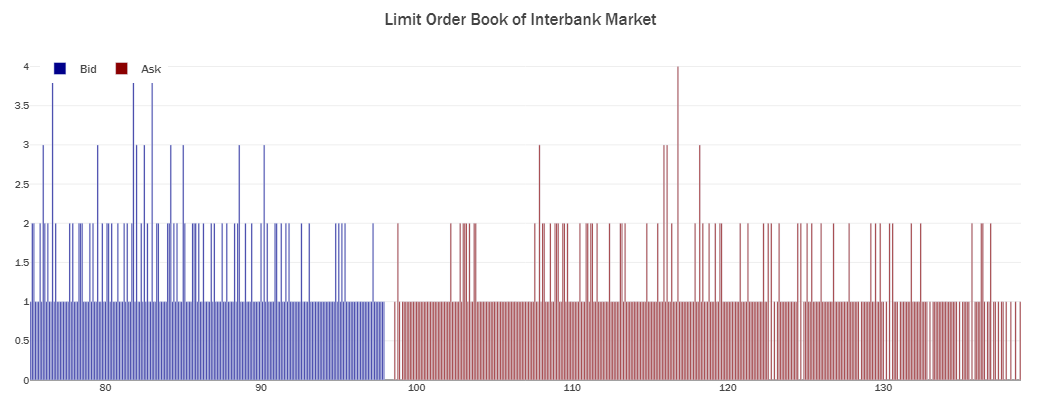

In [16]:
model.bank_details.lob_plot(steps)

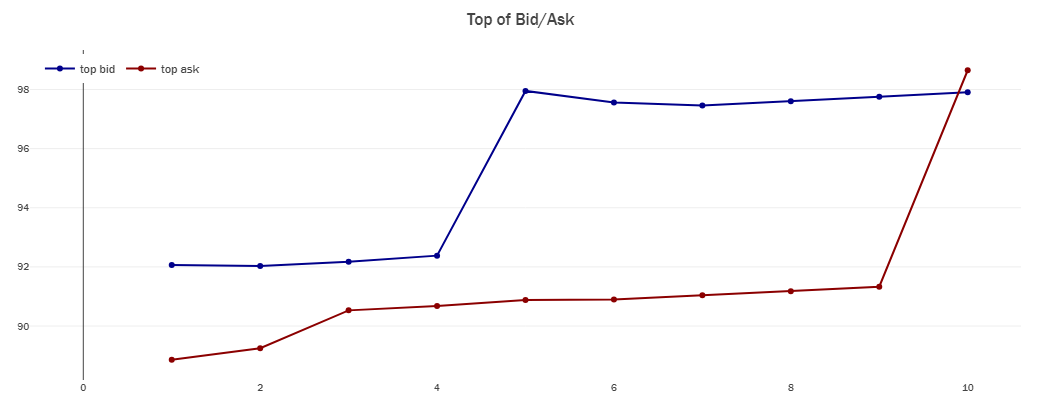

In [17]:
model.bank_details.top_of_book_plot()

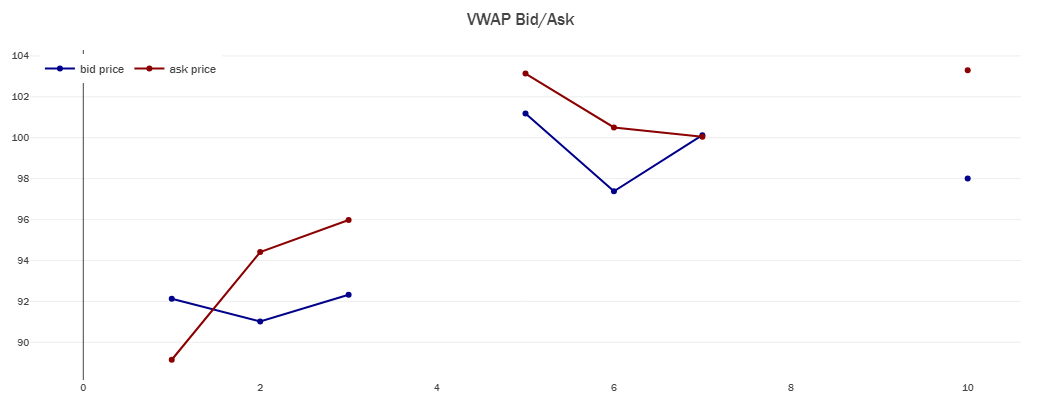

In [18]:
model.bank_details.price_plot()

### Arbitrager Details

In [11]:
model.arbitrager_details.all_ids()

[4850, 4851, 4852, 4853]

In [12]:
model.arbitrager_details.by_agent(model.arbitrager_details.all_ids()[2]).tail()

,Step,Position,Currency A,Currency B,Traded Price,Traded Amount,Traded with,Firm Value
16,16,"(24, 50)",1000,4038.32,[],[],[],1034.918461
17,17,"(24, 50)",1000,4038.32,[],[],[],1034.871724
18,18,"(24, 50)",1000,4038.32,[],[],[],1030.246190
19,19,"(24, 50)",1000,5830.39,"[119.06, 145.58, 119.24, 145.43, 119.3, 145.29...","[1, -1, 1, -1, 1, -1, 1, -1, 1, 0, -1, 1, -1, ...","[4847, 4845, 4847, 4844, 4846, 4845, 4847, 484...",1040.545132
20,20,"(24, 50)",1000,5830.56,"[126.29, 126.46]","[1, -1]","[4849, 4844]",1037.423363


In [13]:
model.arbitrager_details.by_step(steps)

,Agent ID,Position,Currency A,Currency B,Traded Price,Traded Amount,Traded with,Firm Value
0,4850,"(24, 15)",1000,30090.93,"[140.64, 201.88, 140.72, 201.67, 140.95, 201.6...","[1, -1, 1, -1, 1, -1, 1, -1, 1, -1, 1, -1, 1, ...","[4844, 4842, 4845, 4843, 4844, 4842, 4845, 484...",1193.138190
1,4851,"(24, 35)",1000,32580.79,"[139.76, 171.75, 139.94, 171.52, 139.99, 171.3...","[1, -1, 1, -1, 1, -1, 1, -1, 1, -1, 1, -1, 1, ...","[4847, 4842, 4848, 4842, 4847, 4842, 4846, 484...",1209.119320
2,4852,"(24, 50)",1000,5830.56,"[126.29, 126.46]","[1, -1]","[4849, 4844]",1037.423363
3,4853,"(24, 75)",1000,28054.66,"[133.29, 154.84, 133.5, 154.53, 133.71, 154.52...","[1, -1, 1, -1, 1, -1, 1, -1, 1, -1, 1, -1, 1, ...","[4847, 4845, 4847, 4844, 4847, 4845, 4846, 484...",1180.068421


### Speculator Details

In [14]:
model.speculator_details.all_ids()

[4856, 4854, 4855]

In [15]:
model.speculator_details.by_agent(model.speculator_details.all_ids()[0])[:50]

,Step,Position,Currency A,Currency B,Quotes,Traded Price,Traded Amount,Traded with,Firm Value
0,0,"(14, 46)",80.000000,90.000000,"(None, None, None)",[],[],[],170.000000
1,1,"(14, 46)",80.000000,90.000000,"(None, None, None)",[],[],[],224.000000
2,2,"(14, 46)",80.000000,90.000000,"(None, None, None)",[],[],[],248.224299
3,3,"(14, 46)",80.000000,90.000000,"(None, None, None)",[],[],[],248.224299
4,4,"(14, 46)",80.000000,90.000000,"(None, None, None)",[],[],[],251.428571
5,5,"(14, 46)",80.000000,90.000000,"(None, None, None)",[],[],[],253.076923
6,6,"(14, 46)",80.000000,90.000000,"(None, None, None)",[],[],[],254.757282
7,7,"(14, 46)",80.000000,90.000000,"(None, None, None)",[],[],[],258.217822
8,8,"(14, 46)",80.000000,90.000000,"(None, None, None)",[],[],[],263.673469
9,9,"(14, 46)",80.000000,90.000000,"(None, None, None)",[],[],[],265.567010


In [16]:
model.speculator_details.by_step(steps)

,Agent ID,Position,Currency A,Currency B,Quotes,Traded Price,Traded Amount,Traded with,Firm Value
0,4854,"(15, 46)",6.000000,116.100000,"(None, None, None)",[],[],[],211.486726
1,4855,"(15, 70)",100.000000,51.640000,"(None, None, None)",[],[],[],191.398230
2,4856,"(14, 46)",122.497718,-28.222946,"(None, None, None)",[],[],[],72.545601


### Central Bank Detail

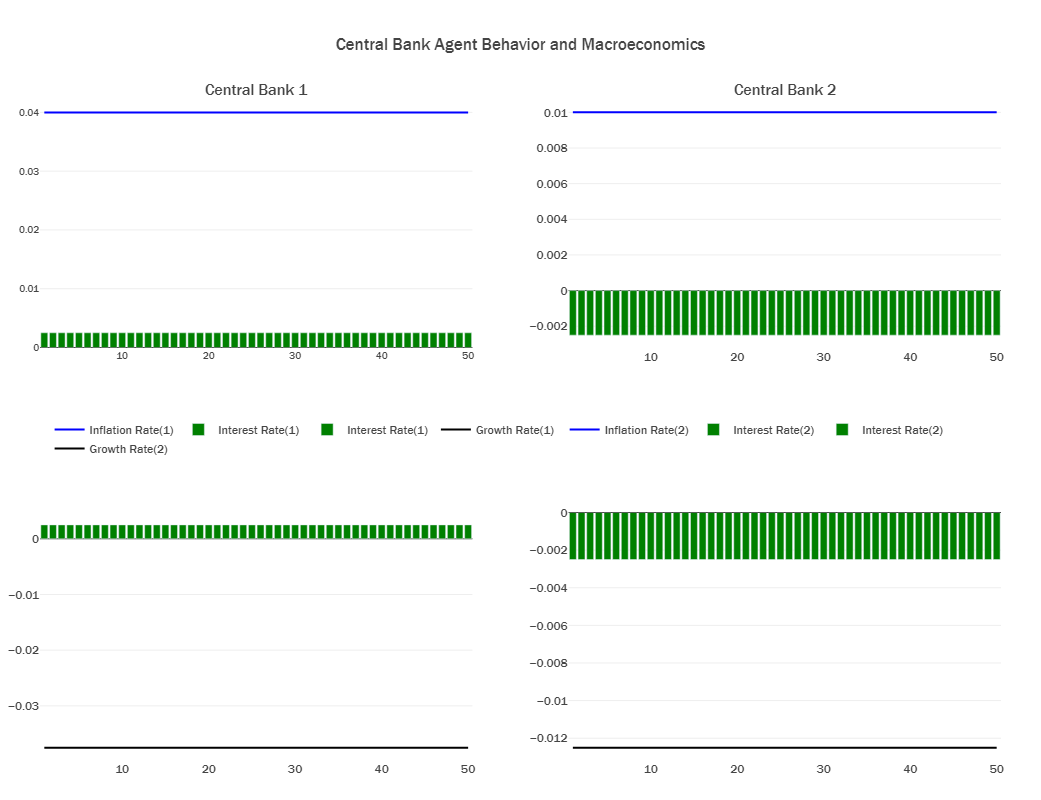

In [21]:
import plotly.graph_objs as go
from plotly.subplots import make_subplots


def plot_central_bank(model_results):

    steps_data = model_results['Step'].values
    interest_rate_1_data, interest_rate_2_data = zip(*model_results['interest_rate'].values)
    inflation_rate_1_data, inflation_rate_2_data = zip(*model_results['inflation_rate'].values)

    growth_rate_1_data, growth_rate_2_data = zip(*model_results['growth_rate'].values)
    target_interest_rate_1_data, target_interest_rate_2_data = zip(*model_results['target_interest_rate'].values)
    target_inflation_rate_1_data, target_inflation_rate_2_data = zip(*model_results['target_inflation_rate'].values)


    fig = make_subplots(rows = 2, cols = 2, subplot_titles=['Central Bank 1', 'Central Bank 2'])
    temp = dict(layout=go.Layout(font=dict(family="Franklin Gothic", size = 12)))

    inflation_rate_1 = go.Scatter(x = steps_data, y = inflation_rate_1_data, name = 'Inflation Rate(1)', mode = 'lines', line = dict(color = 'blue'))
    growth_rate_1 = go.Scatter(x = steps_data, y = growth_rate_1_data, name = 'Growth Rate(1)', mode = 'lines', line = dict(color = 'black'))
    interest_rate_1 = go.Bar(x = steps_data, y = interest_rate_1_data, name = 'Interest Rate(1)', marker = dict(color = 'green'))
    # target_interest_rate_1 = go.Scatter(x = steps_data, y = target_interest_rate_1_data, name = 'target interest rate (1)',  line = dict(color = 'red'))

    inflation_rate_2 = go.Scatter(x = steps_data, y = inflation_rate_2_data, name = 'Inflation Rate(2)', mode = 'lines', line = dict(color = 'blue'))
    growth_rate_2 = go.Scatter(x = steps_data, y = growth_rate_2_data, name = 'Growth Rate(2)', mode = 'lines', line = dict(color = 'black'))
    interest_rate_2 = go.Bar(x = steps_data, y = interest_rate_2_data, name = 'Interest Rate(2)', marker = dict(color = 'green'))
    # target_interest_rate_2 = go.Scatter(x = steps_data, y = target_interest_rate_2_data, name = 'target interest rate (2)',  line = dict(color = 'red'))


    fig.add_trace(inflation_rate_1, row = 1, col = 1)
    fig.add_trace(interest_rate_1, row = 1, col = 1)
    fig.add_trace(interest_rate_1, row = 2, col = 1)
    fig.add_trace(growth_rate_1, row = 2, col = 1)
    # fig.add_trace(target_interest_rate_1, row = 1, col = 1)

    fig.add_trace(inflation_rate_2, row = 1, col = 2)
    fig.add_trace(interest_rate_2, row = 1, col = 2)
    fig.add_trace(interest_rate_2, row = 2, col = 2)
    fig.add_trace(growth_rate_2, row = 2, col = 2)
    # fig.add_trace(target_interest_rate_2, row = 1, col = 2)

    fig.update_layout(title_text = 'Central Bank Agent Behavior and Macroeconomics', showlegend=True)

    fig.update_layout(template = temp,
                      hovermode = 'closest',
                      margin = dict(l = 40, r = 40, t = 100, b = 40),
                      height = 800, 
                      width = 1200, 
                      showlegend = True,
                      xaxis = dict(tickfont=dict(size=10)),  
                      yaxis = dict(side = "left", tickfont = dict(size=10)),
                      xaxis_showgrid = False, 
                      legend = dict(yanchor = "bottom", y = 0.45, xanchor = "left", x = 0.01,  orientation="h"))

    return fig 


plot_central_bank(model_results)

### Agent-Based Map of Resources

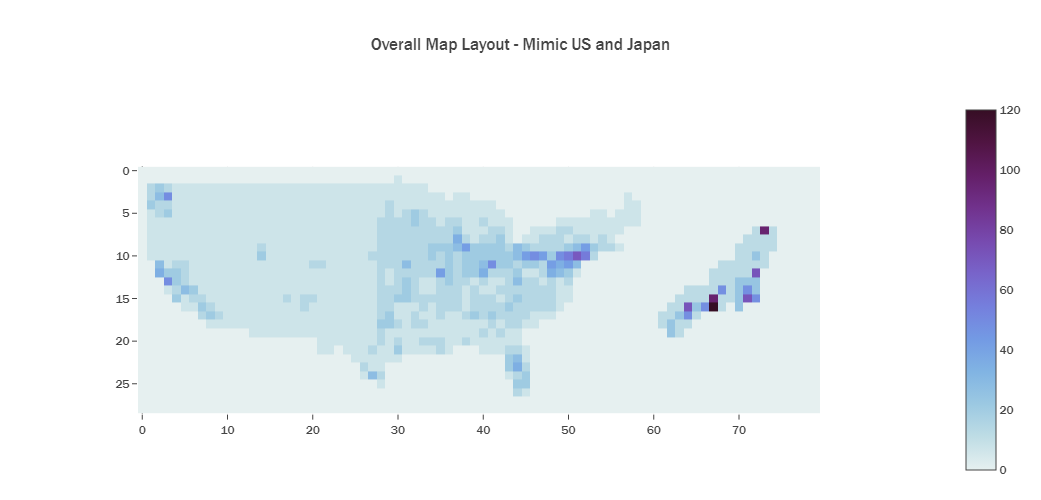

In [22]:
import plotly.express as px
import plotly.graph_objs as go

def plot_map(model):

    map_a = model.static_map.currencyA_map_init
    map_b = model.static_map.currencyB_map_init
    world_map = map_a + map_b

    fig = px.imshow(world_map, color_continuous_scale='dense')
    temp = dict(layout = go.Layout(font=dict(family="Franklin Gothic", size = 12)))

    fig.update_layout(template = temp,
                    title_text = 'Overall Map Layout - Mimic US and Japan',
                    hovermode = 'closest', 
                    margin = dict(l = 20, r = 20, t = 100, b = 20),
                    height = 500, 
                    width = 800, 
                    showlegend = True, 
                    legend = dict(yanchor = "top", 
                                    y = 0.99,
                                    xanchor = "left",
                                    x = 0.01))

    return fig


plot_map(model)

### Visualize How Agents Move 

In [23]:
def built_agent_position_df(model):

    agent_position_df = pd.DataFrame()

    for i in range(steps):

        # corporations
        pos_corps = pd.DataFrame(model.corporate_details.agent_pos[i], index = model.corporate_details.agent_id[i], columns = ["y", "x"]).reset_index(names = 'agent_id')
        pos_corps['steps'] = i
        pos_corps['agent_type'] = 'corps'

        # banks 
        pos_banks = pd.DataFrame(model.bank_details.agent_pos[i], index = model.bank_details.agent_id[i], columns = ["y", "x"]).reset_index(names = 'agent_id')
        pos_banks['steps'] = i
        pos_banks['agent_type'] = 'banks'

        # international banks
        #pos_international_banks = pd.DataFrame(model.international_bank_details.agent_pos[i], index = model.international_bank_details.agent_id[i], columns = ["y", "x"]).reset_index(names = 'agent_id')
        #pos_international_banks['steps'] = i
        #pos_international_banks['agent_type'] = 'international_banks'


        # aggregate position df
        #frames = [pos_corps, pos_banks, pos_international_banks]
        frames = [pos_corps, pos_banks]
        all_position = pd.concat(frames)
        
        if i == 0:
            agent_position_df  = all_position
        
        else:
            frames = [agent_position_df, all_position]
            agent_position_df = pd.concat(frames)


    return agent_position_df


agent_position_df = built_agent_position_df(model)
agent_position_df

,agent_id,y,x,steps,agent_type
0,4640,21,34,0,corps
1,4641,10,28,0,corps
2,4642,9,10,0,corps
3,4643,4,19,0,corps
4,4644,19,27,0,corps
...,...,...,...,...,...
3,4845,23,44,49,banks
4,4846,16,67,49,banks
5,4847,15,71,49,banks
6,4848,15,67,49,banks


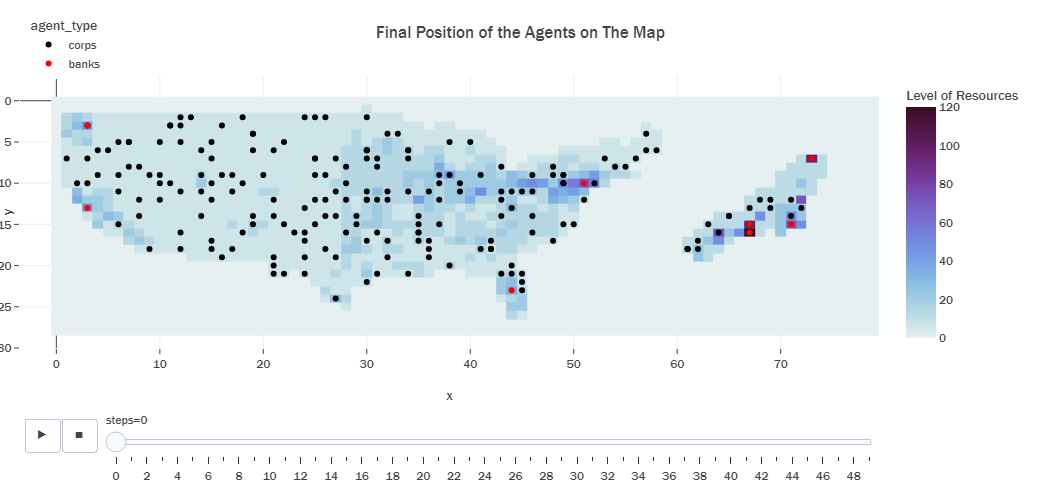

In [24]:

def plot_agent_movement(model, agent_position_df):

    temp = dict(layout=go.Layout(font=dict(family="Franklin Gothic", size = 12)))
    map_a = model.static_map.currencyA_map_init
    map_b = model.static_map.currencyB_map_init
    world_map = map_a + map_b


    fig = px.scatter(agent_position_df, 
                    x = "x", 
                    y = "y", 
                    animation_frame = "steps", 
                    animation_group = "agent_id", 
                    color = "agent_type", 
                    color_discrete_sequence = ["black", "red", "green"],
                    hover_name = "agent_type")

    fig.add_heatmap(z = world_map, 
                    colorscale='dense', 
                    colorbar=dict(title='Level of Resources'))

    fig.update_yaxes(range = [agent_position_df['y'].max() + 5, agent_position_df['y'].min() - 5])

    fig.update_layout(template = temp,
                    title_text = 'Final Position of the Agents on The Map',
                    hovermode = 'closest', 
                    margin = dict(l = 20, r = 20, t = 50, b = 20),
                    height = 500, 
                    width = 1000, 
                    showlegend = True, 
                    legend = dict(yanchor = "bottom", 
                                    y = 0.99,
                                    xanchor = "left",
                                    x = 0.01))
    return fig


plot_agent_movement(model, agent_position_df)

### Number of Agent during Simulation

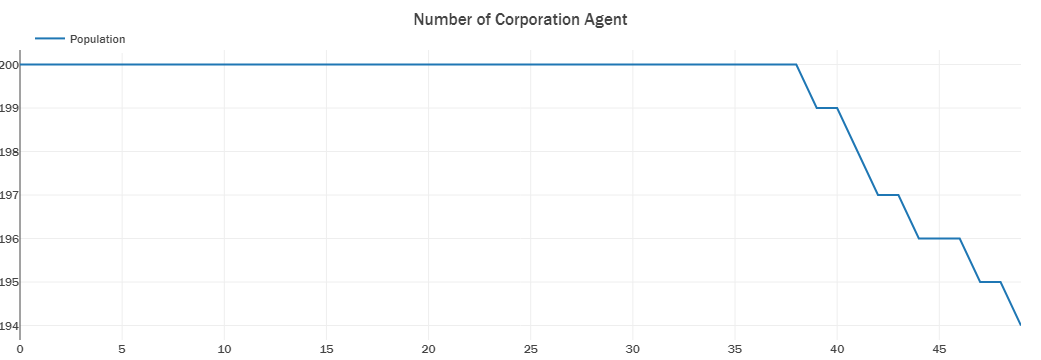

In [25]:
def plot_agent_population(agent_position_df):

    number_of_agents_df = agent_position_df.groupby(['steps', 'agent_type'])['agent_id'].count().reset_index(name = 'Number of Agents')
    number_of_agents_corps = number_of_agents_df[number_of_agents_df['agent_type'] == 'corps']


    fig = make_subplots(rows=1, cols=1)
    temp = dict(layout=go.Layout(font=dict(family="Franklin Gothic", size = 12)))
    corps = go.Scatter(y = number_of_agents_corps['Number of Agents'], name = 'Population')

    # fig.add_trace(banks)
    fig.add_trace(corps)

    fig.update_layout(template = temp,
                    title_text = 'Number of Corporation Agent',
                    hovermode = 'closest', 
                    margin = dict(l = 20, r = 20, t = 50, b = 20),
                    height = 300, 
                    width = 600, 
                    showlegend = True, 
                    legend = dict(yanchor = "bottom", 
                                    y = 0.99,
                                    xanchor = "left",
                                    x = 0.01))

    return fig


plot_agent_population(agent_position_df)

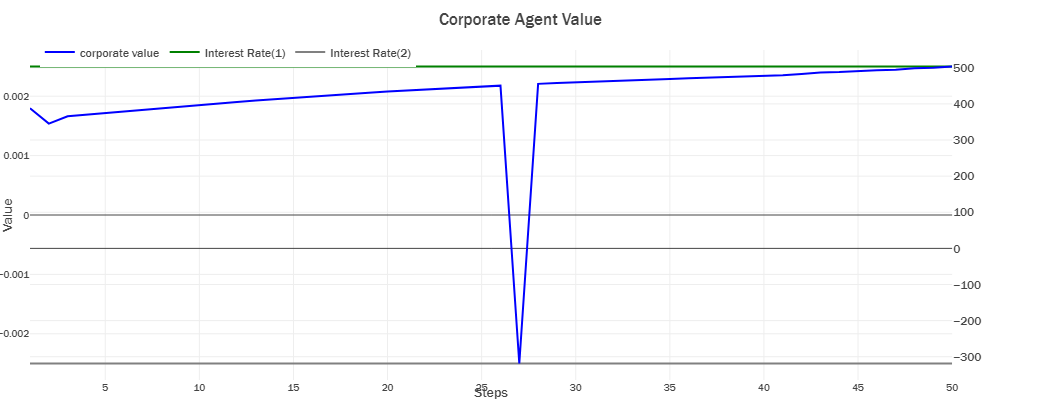

In [26]:
def moving_average(a, n=3):
    ret = np.cumsum(a, dtype=float)
    ret[n:] = ret[n:] - ret[:-n]
    return ret[n - 1:] / n

def corporate_value_and_interest_rate_plot(model, model_results, steps):

    steps_data = model_results['Step'].values
    corporate_value = [model.corporate_details.by_step(i)['Firm Value'].mean() for i in range(steps)]
    interest_rate_1_data, interest_rate_2_data = zip(*model_results['interest_rate'].values)


    fig = make_subplots(rows=1, cols=1, specs=[[{"secondary_y": True}]])

    temp = dict(layout=go.Layout(font=dict(family="Franklin Gothic", size = 12)))
    interest_rate_1 = go.Scatter(x = steps_data, y = interest_rate_1_data, name = 'Interest Rate(1)', line = dict(color = 'green'))
    interest_rate_2 = go.Scatter(x = steps_data, y = interest_rate_2_data, name = 'Interest Rate(2)', line = dict(color = 'grey'))
    corporate_value_line = go.Scatter(x = steps_data, y = corporate_value, name = 'corporate value', line = dict(color = 'blue'))

    fig.add_trace(corporate_value_line, row = 1, col =1, secondary_y='True')
    fig.add_trace(interest_rate_1, row = 1, col = 1)
    fig.add_trace(interest_rate_2, row = 1, col = 1)


    fig.update_layout(template = temp,
                      title = "Corporate Agent Value",
                      hovermode = 'closest',
                      margin = dict(l = 30, r = 30, t = 50, b = 20),
                      height = 400, 
                      width = 800, 
                      showlegend = True,
                      xaxis = dict(title = 'Steps', tickfont = dict(size=10)),
                      yaxis = dict(title = 'Value', side="left", tickfont = dict(size=10)),
                      legend = dict(yanchor = "bottom", y = 0.95, xanchor = "left", x = 0.01,  orientation="h"))

    return fig 



corporate_value_and_interest_rate_plot(model, model_results, steps)

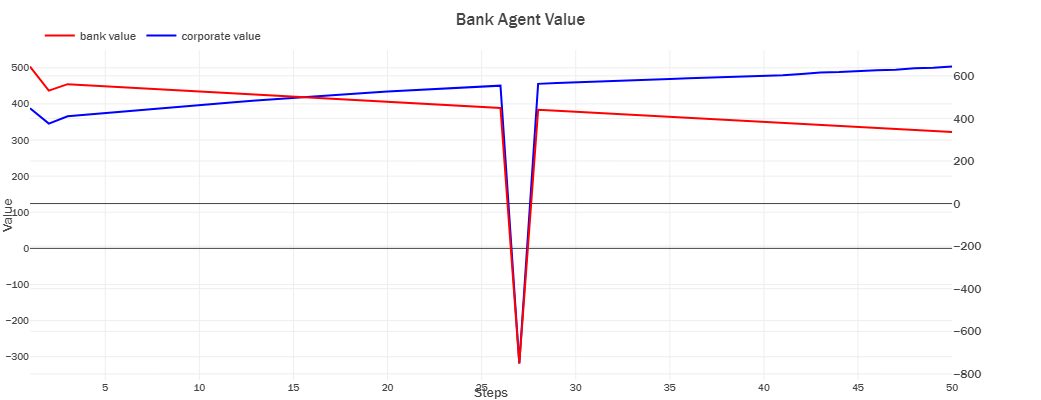

In [27]:
def bank_value_and_interest_rate_plot(model, model_results, steps):

    steps_data = model_results['Step'].values
    bank_value = [model.bank_details.by_step(i)['Firm Value'].mean() / 10 for i in range(steps)]
    traded_volume = model_results['(Corporate V0)'].values
    corporate_value = [model.corporate_details.by_step(i)['Firm Value'].mean() for i in range(steps)]
    interest_rate_1_data, interest_rate_2_data = zip(*model_results['interest_rate'].values)

    fig = make_subplots(rows=1, cols=1, specs=[[{"secondary_y": True}]])

    temp = dict(layout=go.Layout(font=dict(family="Franklin Gothic", size = 12)))
    interest_rate_1 = go.Bar(x = steps_data, y = interest_rate_1_data, name = 'Interest Rate(1)', marker = dict(color = 'green', opacity = 0.6))
    interest_rate_2 = go.Bar(x = steps_data, y = interest_rate_2_data, name = 'Interest Rate(2)', marker = dict(color = 'grey',  opacity = 0.6))
    bank_value_line = go.Scatter(x = steps_data, y = bank_value, name = 'bank value', line = dict(color = 'red'))
    corporate_value_line = go.Scatter(x = steps_data, y = corporate_value, name = 'corporate value', line = dict(color = 'blue'))
    # traded_volume_line = go.Scatter(x = steps_data, y = traded_volume, name = 'traded volume', line = dict(color = 'orange'))

    fig.add_trace(bank_value_line, row = 1, col = 1, secondary_y='True')
    fig.add_trace(corporate_value_line, row = 1, col = 1)
    # fig.add_trace(traded_volume_line, row = 1, col= 1)
    # fig.add_trace(interest_rate_1, row = 1, col = 1)
    # fig.add_trace(interest_rate_2, row = 1, col = 1)


    fig.update_layout(template = temp,
                      title = "Bank Agent Value",
                      hovermode = 'closest',
                      margin = dict(l = 30, r = 30, t = 50, b = 20),
                      height = 400, 
                      width = 800, 
                      showlegend = True,
                      xaxis = dict(title = 'Steps', tickfont = dict(size=10)),
                      yaxis = dict(title = 'Value', side="left", tickfont = dict(size=10)),
                      legend = dict(yanchor = "bottom", y = 1, xanchor = "left", x = 0.01,  orientation="h"))

    return fig 


bank_value_and_interest_rate_plot(model, model_results, steps)

### playground - Stylized Facts

In [24]:
import datetime as dt
import yfinance as yf 
from fredapi import Fred 
import statsmodels.api as sm
from scipy.stats import norm

In [25]:
best_bid = []
best_ask = []
mid_price = []


for i in range(steps):

    interbank_bid, interbank_ask = model.bank_details.lob(step = i)

    try:
        best_bid_price = np.sort(list(interbank_bid.keys()))[-1]
    except:
        best_bid_price = np.NaN
    
    try:
        best_ask_price = np.sort(list(interbank_ask.keys()))[0]
    except:
        best_ask_price = np.NaN

    best_bid.append(best_bid_price)
    best_ask.append(best_ask_price)
    mid_price.append((best_bid_price + best_ask_price)/2)



interest_rate_1_data, interest_rate_2_data = zip(*model_results['interest_rate'].values)

price_df = pd.DataFrame()
price_df['time_steps'] = np.arange(1, steps +1)
price_df['Ask(1)'] = best_ask
price_df['Bid(1)'] = best_bid
price_df['Mid Price'] = mid_price

price_df['interest_rate_1'] = interest_rate_1_data
price_df['interest_rate_2'] = interest_rate_2_data
price_df['interest_rate_diff'] = price_df['interest_rate_1'] - price_df['interest_rate_2']
price_df['return_mid_price'] = np.log(price_df['Mid Price']).diff()

price_df

,time_steps,Ask(1),Bid(1),Mid Price,interest_rate_1,interest_rate_2,interest_rate_diff,return_mid_price
0,1,NaN,NaN,NaN,0.0025,-0.0025,5.000000e-03,NaN
1,2,0.52,0.73,0.625,0.0025,-0.0025,5.000000e-03,NaN
2,3,0.51,0.56,0.535,0.0025,-0.0025,5.000000e-03,-0.155485
3,4,0.51,0.56,0.535,0.0025,-0.0025,5.000000e-03,0.000000
4,5,0.50,0.55,0.525,0.0025,-0.0025,5.000000e-03,-0.018868
...,...,...,...,...,...,...,...,...
195,196,0.79,0.52,0.655,0.0025,0.0025,-8.673617e-19,-0.007605
196,197,0.77,0.51,0.640,0.0025,0.0025,-8.673617e-19,-0.023167
197,198,0.76,0.51,0.635,0.0025,0.0025,-8.673617e-19,-0.007843
198,199,0.68,0.46,0.570,0.0025,0.0025,-8.673617e-19,-0.107989


In [26]:
# yfinance likes the tickers formatted as a list
api_key = 'a0aee094a9b908bd7c16baece8df8419'
start_date = dt.datetime(2000,1,1)
end_date =  dt.datetime(2024,1,1)


def get_market_data(start_date, end_date, api_key):

    yahoo_df = yf.download("JPY=X", start = start_date, end = end_date, interval='1d')
    fred = Fred(api_key = api_key)

    fed_rate = fred.get_series('DFF').reset_index(name = 'fed fund effective rate')
    jp_rate = fred.get_series('IRSTCI01JPM156N').reset_index(name = 'BOJ effective rate')
    interest_rate_df = pd.merge(fed_rate, jp_rate)
    interest_rate_df['interest_rate_diff'] = interest_rate_df['fed fund effective rate'] - interest_rate_df['BOJ effective rate'] 

    # yahoo_df = pd.merge(yahoo_df, interest_rate_df, left_index=True, right_on='index')
    yahoo_df['return'] = np.log(yahoo_df['Close']).diff(1)

    merge_df = pd.merge(yahoo_df, interest_rate_df, left_index = True, right_on = 'index')

    return yahoo_df, interest_rate_df, merge_df



yahoo_df, interest_rate_df, merge_df = get_market_data(start_date, end_date, api_key)
yahoo_df

[*********************100%%**********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume,return
Date,,,,,,,
2000-01-03,102.070000,103.330002,101.309998,101.690002,101.690002,0,NaN
2000-01-04,101.639999,103.320000,101.470001,103.139999,103.139999,0,0.014158
2000-01-05,103.129997,104.480003,102.750000,104.089996,104.089996,0,0.009169
2000-01-06,104.089996,105.559998,103.900002,105.230003,105.230003,0,0.010893
2000-01-07,105.260002,105.879997,104.830002,105.330002,105.330002,0,0.000950
...,...,...,...,...,...,...,...
2023-12-25,142.341995,142.479996,142.139008,142.341995,142.341995,0,0.001913
2023-12-26,142.229996,142.619995,142.108002,142.229996,142.229996,0,-0.000787
2023-12-27,142.460999,142.832001,141.858002,142.460999,142.460999,0,0.001623


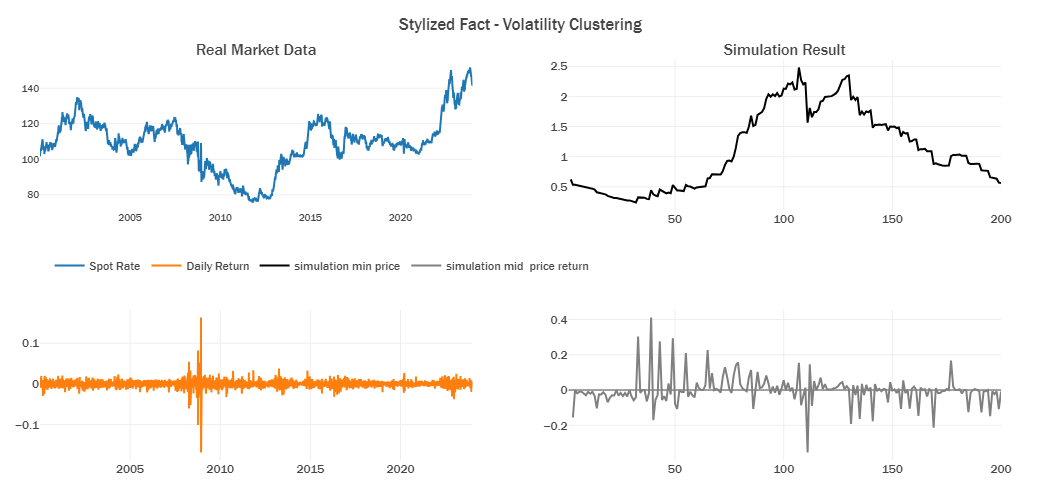

In [27]:
fig = make_subplots(rows = 2, cols = 2, subplot_titles = ['Real Market Data', 'Simulation Result'])
temp = dict(layout=go.Layout(font=dict(family="Franklin Gothic", size = 12)))


daily_price_line = go.Scatter(x = yahoo_df.index, y = yahoo_df['Close'], name = 'Spot Rate')
daily_return_line = go.Scatter(x = yahoo_df.index, y = yahoo_df['return'], name = 'Daily Return')

simulation_price_line = go.Scatter(x = price_df['time_steps'], y = price_df['Mid Price'], name = 'simulation min price', line = dict(color = ' black'))
simulation_return_line = go.Scatter(x = price_df['time_steps'], y = price_df['return_mid_price'], name = 'simulation mid  price return', line = dict(color = 'gray'))

fig.update_layout(title_text = 'Stylized Fact - Volatility Clustering', showlegend=True)
fig.add_trace(daily_price_line, row = 1, col = 1)
fig.add_trace(daily_return_line, row = 2, col = 1)
fig.add_trace(simulation_price_line, row = 1, col = 2)
fig.add_trace(simulation_return_line, row = 2, col = 2)


fig.update_layout(template = temp,
                    hovermode = 'closest',
                      margin = dict(l = 40, r = 40, t = 60, b = 40),
                      height = 500, 
                      width = 1200, 
                      showlegend = True,
                      xaxis = dict(tickfont=dict(size=10)),  
                      yaxis = dict(side = "left", tickfont = dict(size=10)),
                      xaxis_showgrid = False, 
                      legend = dict(yanchor = "bottom", y = 0.45, xanchor = "left", x = 0.01,  orientation="h"))


fig

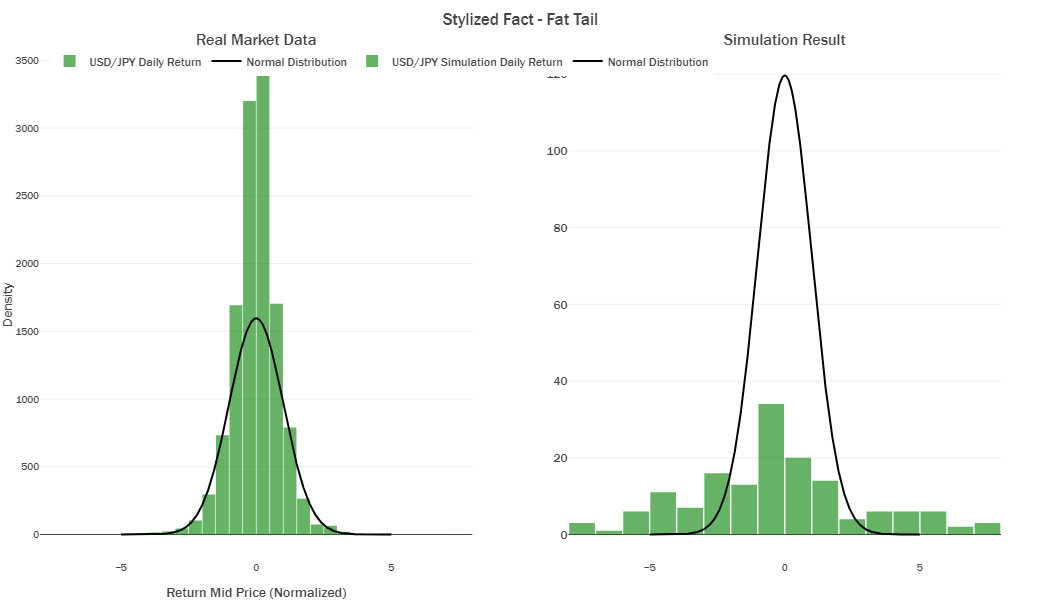

In [28]:
# Create histogram

# Calculate mean and standard deviation
mu, sigma = yahoo_df['return'].mean(), yahoo_df['return'].std()
simulated_mu, simulated_sigma = yahoo_df['return'].mean(), yahoo_df['return'].std()

# hist_fig = go.Figure()
hist_fig = make_subplots(rows = 1, cols = 2, subplot_titles = ['Real Market Data', 'Simulation Result'])
daily_return_histogram = go.Histogram(x = (yahoo_df['return']- mu) / sigma, 
                                      nbinsx = 200, 
                                      histnorm = 'density', 
                                      marker_color = 'rgba(0, 128, 0, 0.6)',
                                      name = 'USD/JPY Daily Return')

simulation_return_histogram = go.Histogram(x = (price_df['return_mid_price'] - simulated_mu)/simulated_sigma, 
                                               nbinsx = 200, 
                                               histnorm = 'density', 
                                               marker_color = 'rgba(0, 128, 0, 0.6)',
                                               name = 'USD/JPY Simulation Daily Return')


# Plot the normal distribution
x = np.linspace(-5, 5, 1000)
y = norm.pdf(x, 0, 1) * 4000 # Standard normal distribution
y2 = norm.pdf(x, 0, 1) * 300

normal_distribution_trace = go.Scatter(x = x, y = y, mode='lines', line=dict(color='black', width=2), name = 'Normal Distribution')
simulated_normal_distribution_trace = go.Scatter(x = x, y = y2, mode='lines', line=dict(color='black', width=2), name = 'Normal Distribution')


# Add histogram trace
hist_fig.add_trace(daily_return_histogram, row = 1, col = 1)
hist_fig.add_trace(normal_distribution_trace, row = 1, col = 1)
hist_fig.add_trace(simulation_return_histogram, row = 1, col = 2)
hist_fig.add_trace(simulated_normal_distribution_trace, row = 1, col = 2)


hist_fig.update_layout(template = temp,
                       title = 'Stylized Fact - Fat Tail',
                       hovermode = 'closest',
                       xaxis_title='Return Mid Price (Normalized)',
                       yaxis_title='Density',
                       bargap = 0.05,
                       margin = dict(l = 40, r = 40, t = 50, b = 40),
                       height = 600, 
                       width = 1000, 
                       showlegend = True,
                       xaxis = dict(tickfont=dict(size=10), range=[-8, 8]),  
                       xaxis2 = dict(tickfont=dict(size=10), range=[-8, 8]),  
                       yaxis = dict(side = "left", tickfont = dict(size=10)),
                       xaxis_showgrid = False, 
                       legend = dict(yanchor = "bottom", y = 0.95, xanchor = "left", x = 0.01,  orientation = "h"))

# Show plot
hist_fig.show()


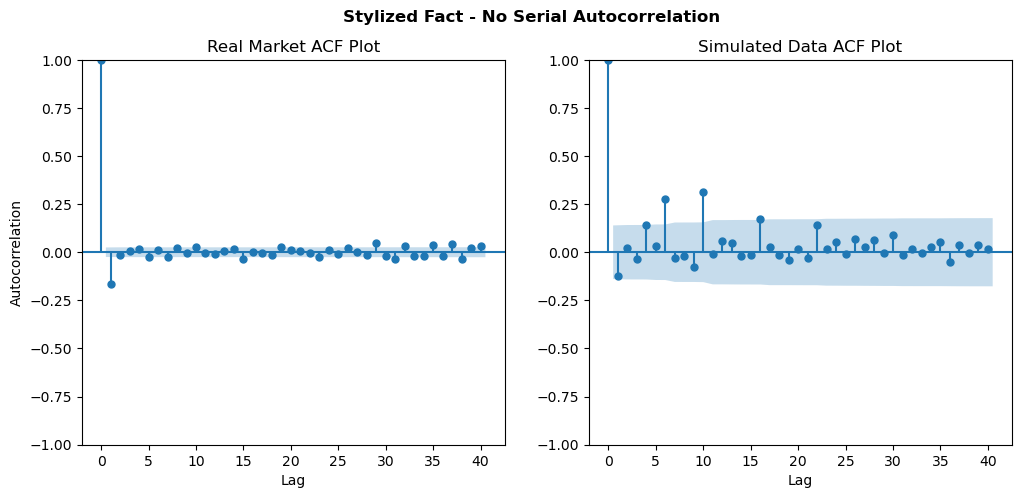

In [29]:
from statsmodels.graphics.tsaplots import plot_acf


return_data = yahoo_df['return'].dropna()
simulated_return_data = price_df['return_mid_price'].dropna()

# Create ACF plot
fig, (ax1, ax2) = plt.subplots(1, 2, figsize = (12, 5))

fig.suptitle('Stylized Fact - No Serial Autocorrelation', fontweight = 'bold', fontsize = 12) # set title
plot_acf(return_data, ax = ax1, lags = 40)  # Adjust lags as needed
plot_acf(simulated_return_data, ax = ax2, lags = 40)  # Adjust lags as needed

ax1.set_title('Real Market ACF Plot')
ax2.set_title('Simulated Data ACF Plot')
ax1.set_xlabel('Lag')
ax2.set_xlabel('Lag')
ax1.set_ylabel('Autocorrelation')
plt.show()

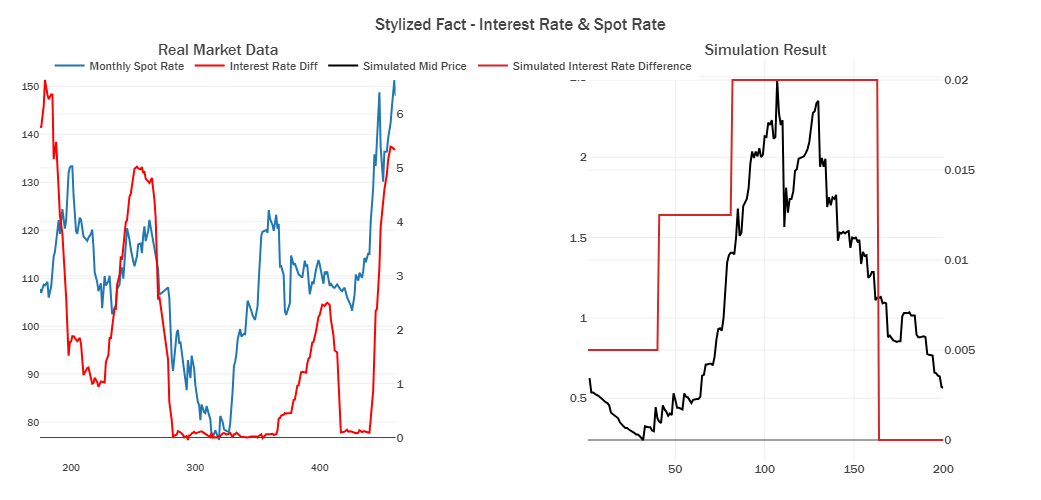

In [30]:
import plotly.graph_objects as go
from plotly.subplots import make_subplots

# Create subplots with one row and one column
fig = make_subplots(rows=1, cols=2, specs=[[{'secondary_y': True}, {'secondary_y': True}]], subplot_titles = ['Real Market Data', 'Simulation Result'])

# Define your traces
daily_price_line = go.Scatter(x = merge_df.index, y = merge_df['Close'], name = 'Monthly Spot Rate')
interest_rate_diff_line = go.Scatter(x = merge_df.index, y = merge_df['interest_rate_diff'], name = 'Interest Rate Diff', line = dict(color = ' red'))

simulated_price_line = go.Scatter(x = price_df['time_steps'], y = price_df['Mid Price'], name = 'Simulated Mid Price', line = dict(color = 'black'))
simulated_interest_rate_diff_line = go.Scatter(x = price_df['time_steps'], y = price_df['interest_rate_diff'], name = 'Simulated Interest Rate Difference')

# Add trace1 to the subplot
fig.add_trace(daily_price_line, col = 1, row = 1)
fig.add_trace(interest_rate_diff_line, secondary_y=True, col = 1, row = 1)

fig.add_trace(simulated_price_line, col = 2, row = 1)
fig.add_trace(simulated_interest_rate_diff_line, secondary_y=True, col = 2, row = 1)

fig.update_layout(template = temp,
                  title = 'Stylized Fact - Interest Rate & Spot Rate',
                  hovermode = 'closest',
                  margin = dict(l = 40, r = 40, t = 60, b = 40),
                  height = 500, 
                  width = 1200, 
                  showlegend = True,
                  xaxis = dict(tickfont=dict(size=10)),  
                  yaxis = dict(side = "left", tickfont = dict(size=10)),
                  xaxis_showgrid = False, 
                  legend = dict(yanchor = "bottom", y = 0.95, xanchor = "left", x = 0.01,  orientation="h"))

# Show the figure
fig.show()

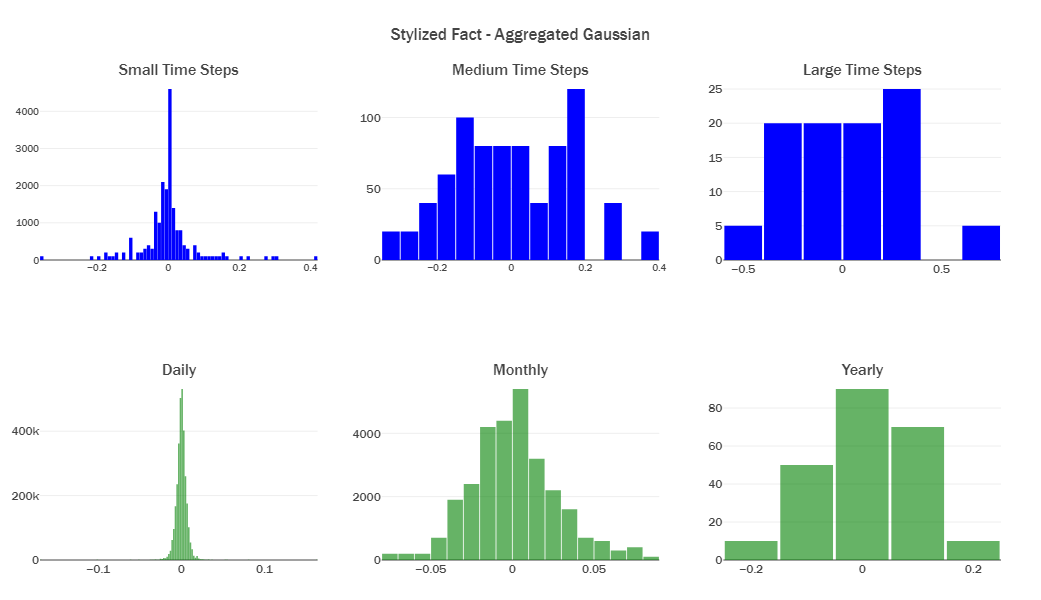

In [71]:
resample_price_df_1 = price_df.groupby(price_df.index // 5).last()
resample_price_df_2 = price_df.groupby(price_df.index // 10).last()


resample_price_df_1['return_mid_price'] = np.log(resample_price_df_1['Mid Price']).diff()
resample_price_df_2['return_mid_price'] = np.log(resample_price_df_2['Mid Price']).diff()


monthly_df = yahoo_df.to_period('M').groupby('Date').last()
yearly_df = yahoo_df.to_period('Y').groupby('Date').last()

monthly_df['return'] = np.log(monthly_df['Close']).diff()
yearly_df['return'] = np.log(yearly_df['Close']).diff()


fig = make_subplots(rows=2, cols=3, subplot_titles = ['Small Time Steps', 'Medium Time Steps', 'Large Time Steps', 'Daily', 'Monthly', 'Yearly'])

simulated_daily_return_histogram = go.Histogram(x = price_df['return_mid_price'], nbinsx = 100,  histnorm = 'density', marker_color = 'blue')
simulated_monthly_return_histogram = go.Histogram(x = resample_price_df_1['return_mid_price'], nbinsx = 20,  histnorm = 'density', marker_color = 'blue')
simulated_yearly_return_histogram = go.Histogram(x = resample_price_df_2['return_mid_price'], nbinsx = 10,  histnorm = 'density', marker_color = 'blue')

daily_return_histogram = go.Histogram(x = yahoo_df['return'], nbinsx = 300,  histnorm = 'density', marker_color = 'rgba(0, 128, 0, 0.6)')
monthly_return_histogram = go.Histogram(x = monthly_df['return'], nbinsx = 30,  histnorm = 'density', marker_color = 'rgba(0, 128, 0, 0.6)')
yearly_return_histogram = go.Histogram(x = yearly_df['return'], nbinsx = 6,  histnorm = 'density', marker_color = 'rgba(0, 128, 0, 0.6)')


fig.add_trace(simulated_daily_return_histogram, row = 1, col = 1)
fig.add_trace(simulated_monthly_return_histogram, row = 1, col = 2)
fig.add_trace(simulated_yearly_return_histogram, row = 1, col = 3)


fig.add_trace(daily_return_histogram, row = 2, col = 1)
fig.add_trace(monthly_return_histogram, row = 2, col = 2)
fig.add_trace(yearly_return_histogram, row = 2, col = 3)


fig.update_layout(template = temp,
                       title = 'Stylized Fact - Aggregational Gaussianity',
                       hovermode = 'closest',
                       bargap = 0.05,
                       margin = dict(l = 40, r = 40, t = 80, b = 40),
                       height = 600, 
                       width = 1000, 
                       showlegend = False,
                       xaxis = dict(tickfont=dict(size=10)),  
                       xaxis2 = dict(tickfont=dict(size=10)),  
                       yaxis = dict(side = "left", tickfont = dict(size=10)),
                       xaxis_showgrid = False, 
                       legend = dict(yanchor = "bottom", y = 0.95, xanchor = "left", x = 0.01,  orientation = "h"))

fig.show()